
## 01MIAR - Actividad Video Valencia Pollution

## NumPy y Pandas

### Objetivos:
- Aplicar diferentes técnicas de tratamiento de estructuras numéricas con Numpy y datos estructurados con Pandas.

### Instrucciones:
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación. Siempre será tenido en cuenta cualquier detalle técnico avanzado o no visto en clase relacionado con el tema (explicar el porqué y usabilidad).
- No está permitido compartir los resultados ni el código en ninguno de los foros.
- Revisar los temas así como las sesiones sobre Numpy y Pandas para aplicar dichos contenidos.
- Proponer las respuestas en las celdas a dicho efecto en cada punto, si se necesitan más celdas añadirlas en su sitio correspondiente
- Mostrar de manera clara la respuesta a las preguntas, mediante código

### Entrega:
- Este mismo notebook con las respuetas

### Evaluación
- Esta actividad corresponde con el 10% de la nota final de la asignatura.

### Fecha Realización
- Convocatoria 1 - 29/11/2024 00:00 - 29/11/2024 23:59

#### Descripción
El conjunto de datos "valencia_pollution_dataset.csv" (fichero disponible adjunto a la actividad) proviene de una descarga de datos del servicio web del ayuntamiento de la ciudad de Valencia de datos abiertos.

Los datos recabados de este servicio web son de mediciones cada hora de una serie de estaciones de contaminación atmosférica.

https://valencia.opendatasoft.com/explore/dataset/estacions-contaminacio-atmosferiques-estaciones-contaminacion-atmosfericas/information/

Cada estación realiza una serie de mediciones acerca de la calidad del aire, y de ciertas sustancias que se consideran importantes para analizar la contaminación atmosférica en la ciudad.

#### Columnas para trabajar:
- objectid: id de la estación
- nombre: nombre de la estación
- dirección: dirección de la estación
- tipozona: tipo de la zona, urbana o sub urbana
- tipoemision: tráfico o fondo
- so2: niveles de dióxido de azufre
- no2: niveles de dióxido de nitrogeno
- o3: niveles de ozono
- co: niveles de monóxido de carbono
- pm10: niveles de partículas en suspensión hasta 10um
- pm25: niveles de partículas en suspensión hasta 2,5um
- fecha_carga: timestamp de la actualización de los datos
- calidad_ambiental: estimación de la calidad del aire

Empecemos por importar las librerías que necesitaremos.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## 01
Carga de datos de csv (valencia_pollution_dataset.csv) en un DataFrame

In [2]:
df=pd.read_csv('valencia_pollution_dataset.csv') #Leemos el CSV. Abriéndolo se ve que tiene la coma como separador, que es el que utilizamos por defecto en la lectura, así que no hay problema.

In [3]:
display(df) #Lo mostramos para ver su aspecto.

,objectid,nombre,direccion,tipozona,tipoemision,so2,no2,o3,co,pm10,pm25,fecha_carga,calidad_ambiental
0,26,Pista de Silla,"C/ Filipinas, s/n",Urbana,Tráfico,0.0,10,71.0,0.7,8.0,3.0,2024-05-24T20:20:06+00:00,Razonablemente Buena
1,28,Viveros,Jardines de Viveros,Urbana,Fondo,0.0,5,88.0,NaN,NaN,NaN,2024-05-24T20:20:08+00:00,Razonablemente Buena
2,431,Olivereta,Av. del Cid amb Av. de les Tres Creus,Urbana,Tráfico,NaN,24,NaN,NaN,20.0,11.0,2024-05-24T20:20:11+00:00,Razonablemente Buena
3,432,Patraix,"Archiduque Carlos, 84ac",Urbana,Tráfico,NaN,15,NaN,NaN,20.0,11.0,2024-05-24T20:20:12+00:00,Razonablemente Buena
4,23,Francia,"Avda. de Francia, 60",Urbana,Tráfico,1.0,3,82.0,0.1,9.0,6.0,2024-05-24T20:20:04+00:00,Razonablemente Buena
...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,26,Pista de Silla,"C/ Filipinas, s/n",Urbana,Tráfico,0.0,7,45.0,0.7,7.0,3.0,2024-05-26T10:20:07+00:00,Buena
392,22,Centro,Plaza Ayuntamiento,Urbana,Tráfico,NaN,11,NaN,NaN,15.0,8.0,2024-05-26T10:20:10+00:00,Buena
393,430,Dr. Lluch,"Calle Dr. Lluch, 48",Urbana,Tráfico,NaN,6,NaN,NaN,24.0,10.0,2024-05-26T10:20:11+00:00,Razonablemente Buena
394,431,Olivereta,Av. del Cid amb Av. de les Tres Creus,Urbana,Tráfico,NaN,15,NaN,NaN,20.0,11.0,2024-05-26T10:20:12+00:00,Razonablemente Buena


El dataset contiene algunos NaN's que habrá que limpiar y el tiempo está en un formato que seguramente tengamos que cambiar para poder trabajar con él.

## 02
- ¿Cuál es el rango temporal del dataset?
- Obtención del número de estaciones que tienen un sensor para medir monóxido de carbono

Empecemos primero por computar el número de estaciones que son capaces de medir la concentración de CO en el aire, que es lo más sencillo. Esto lo haremos ignorando las filas cuyos valores en CO no son numéricos y viendo cuantos nombres distintos hay para este dataset filtrado. (Asumimos que las estaciones se llaman diferente)

In [4]:
#Filtramos las filas que no tienen un NaN en su medicion del CO, que son las que nos interesan
modificado= df[df['co'].notna()] 

#El método nunique() cuenta el número de valores únicos en una columna, excluyendo 
#valores nulos por defecto. Como cada estación se llama diferente, cuantos valores 
# diferentes haya, será el número de estaciones que pueden medir la concentración de CO
estaciones = modificado['nombre'].nunique() 

print(f'Hay {estaciones} estaciones que tienen un sensor para medir CO')

Hay 3 estaciones que tienen un sensor para medir CO


Procedamos con el rango temporal. De primeras, podemos ver que la fecha está expresada en un formato particular. Este formato es el correspondiente a la norma ISO 8601 , algo que es muy estándar en la toma de datos automatizada.

Investigando, he encontrado que to_datetime() es un método de pandas que transforma este tipo de fechas a algo con lo que podemos trabajar. Vamos a ello:

In [5]:
# Convertimos la columna de la fecha a tipo datetime
df['fecha_carga'] = pd.to_datetime(df['fecha_carga']) #este método transforma a fechas de la forma 2024-05-25 15:30:10+00:00

# Calculamos el rango temporal, es decir, el tiempo que pasa entre la primera fecha y la última en el tiempo.
fecha_temprana = df['fecha_carga'].min()
fecha_tardia = df['fecha_carga'].max()

rango_temporal = fecha_tardia - fecha_temprana

print(f"El rango temporal es: {rango_temporal} hours")

El rango temporal es: 1 days 14:00:09 hours


## 03

- Número de estación con la media más alta de mediciones de monóxido de carbono

Haciendo un display de los datos filtrados anteriores, a simple vista podemos ver que las 3 estaciones que pueden medir los datos son Pista de Silla, Francia y Molí del Sol

In [6]:
display(modificado)

,objectid,nombre,direccion,tipozona,tipoemision,so2,no2,o3,co,pm10,pm25,fecha_carga,calidad_ambiental
0,26,Pista de Silla,"C/ Filipinas, s/n",Urbana,Tráfico,0.0,10,71.0,0.7,8.0,3.0,2024-05-24T20:20:06+00:00,Razonablemente Buena
4,23,Francia,"Avda. de Francia, 60",Urbana,Tráfico,1.0,3,82.0,0.1,9.0,6.0,2024-05-24T20:20:04+00:00,Razonablemente Buena
9,25,Molí del Sol,Avda. Pío Baroja - Avda. General Avilés,Suburbana,Tráfico,4.0,6,76.0,0.3,7.0,5.0,2024-05-24T20:20:05+00:00,Razonablemente Buena
11,25,Molí del Sol,Avda. Pío Baroja - Avda. General Avilés,Suburbana,Tráfico,4.0,5,77.0,0.3,7.0,5.0,2024-05-24T23:20:06+00:00,Razonablemente Buena
15,26,Pista de Silla,"C/ Filipinas, s/n",Urbana,Tráfico,0.0,4,73.0,0.7,8.0,3.0,2024-05-24T23:20:07+00:00,Razonablemente Buena
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,25,Molí del Sol,Avda. Pío Baroja - Avda. General Avilés,Suburbana,Tráfico,3.0,8,38.0,0.3,7.0,6.0,2024-05-26T09:20:05+00:00,Buena
382,23,Francia,"Avda. de Francia, 60",Urbana,Tráfico,1.0,3,46.0,0.1,9.0,6.0,2024-05-26T09:20:04+00:00,Buena
385,23,Francia,"Avda. de Francia, 60",Urbana,Tráfico,1.0,3,45.0,0.1,9.0,6.0,2024-05-26T10:20:05+00:00,Buena
391,26,Pista de Silla,"C/ Filipinas, s/n",Urbana,Tráfico,0.0,7,45.0,0.7,7.0,3.0,2024-05-26T10:20:07+00:00,Buena


Calculemos las medias de concentración de CO para los sub-datasets que sólo contienen datos de las estaciones seleccionadas.

In [7]:
#PDS=Pista de Silla, FR=Francia, MDS=Molí del Sol

CO_PDS=modificado[modificado['nombre']=='Pista de Silla']['co'].mean() #Utilizamos el método que nos da la media de la columna seleccionada
CO_FR=modificado[modificado['nombre']=='Francia']['co'].mean()
CO_MDS=modificado[modificado['nombre']=='Molí del Sol']['co'].mean()

(CO_PDS,CO_FR,CO_MDS)

(0.6999999999999998, 0.10000000000000002, 0.30000000000000004)

Como vemos, la estación con la media de la concentración de CO más alta es Pista de Silla cuyo número es 26, si nos referimos al dataframe original.

Esto también puede hacerse en una sola línea y más elegante, como se muestra a continuación, pero yo apuesto por la legibilidad de la manera que acabamos de exponer anteriormente.

In [8]:
#Con groupby agrupamos por nombre y con idxmax obtenemos el nombre con la media más alta. Posteriormente localizamos el índice (el que sea) de esa estación.
indice = df[df['nombre'] == df.groupby('nombre')['co'].mean().idxmax()]['objectid'].iloc[0] 

print(f"El número de la estación con la media de concentración CO más alta es: {indice}")

#Comentario a título personal: He de decir que me ha sorprendido el uso de la función idxmax, que tiene un funcionamiento tan súmamente específico y no la conocía.

El número de la estación con la media de concentración CO más alta es: 26


## 04
Realizar el histograma de dióxido de nitrógeno de la estación del punto anterior

<Axes: >

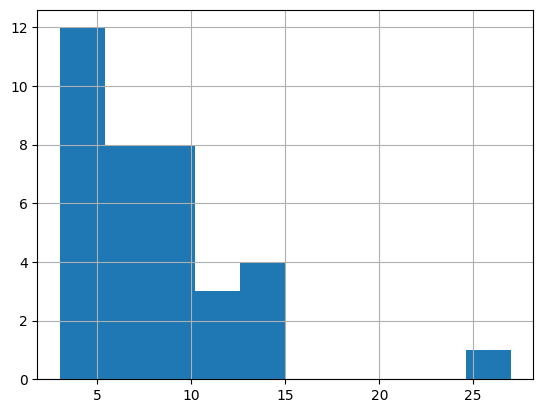

In [9]:
#Simplemente utilizamos esta vez el método histograma (similar al de numpy) con el df filtrado para PDS como anteriormente.
hist = modificado[modificado['nombre']=='Pista de Silla']['no2'].hist()

hist

## 05
Realizar gráfica con  la línea temporal de las mediciones de ozono de la estación del punto anterior. Pista, la columna 'fecha_carga' habría que cambiarla de tipo.

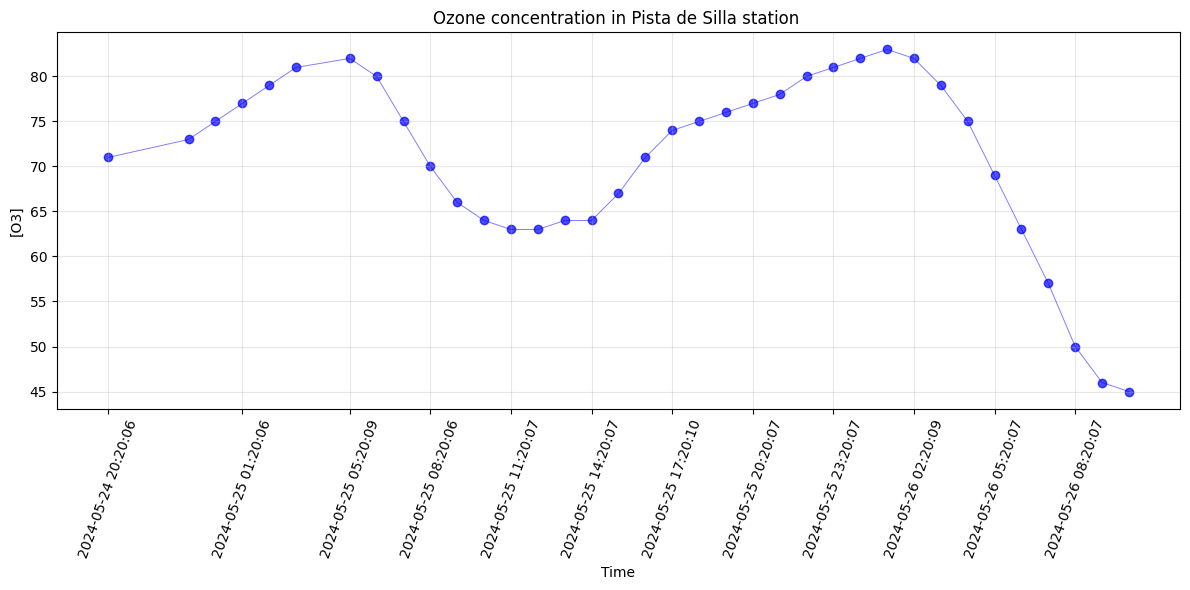

In [11]:
#Hacemos una copia del df modificado filtrado para PDS porque modificar columnas directamente en una vista puede ser algo problemático y que no queremos en absoluto.
O3 = modificado[modificado['nombre']=='Pista de Silla'].copy()

#Transformamos la columna de la fecha de la toma de datos utilizando el método anterior
O3['fecha_carga'] = pd.to_datetime(O3['fecha_carga'])

#Dibujamos con la receta usual de matplotlib
fig, ax = plt.subplots(figsize=(12, 6))

#El eje temporal se presenta farragoso pero quiero visualizarlo con ticks con las fechas en un buen formato y con claridad
ax.set_xticks(O3['fecha_carga'][::len(O3)//10])  # Opcional: Reducir el número de ticks para legibilidad, ya que hay demasiadas fechas
ax.set_xticklabels(O3['fecha_carga'][::len(O3)//10].dt.strftime('%Y-%m-%d %H:%M:%S'), rotation=70) #para incluir en un formato más familiar hasta los segundos

#Dibujamos puntos (porque los datos son discretos) pero también lineas (ayuda a visualizar la tendencia)
ax.plot(O3['fecha_carga'], O3['o3'], color='blue', alpha=0.5, linestyle='-', linewidth=0.7)
ax.scatter( O3['fecha_carga'],O3['o3'], color='blue', linestyle='-', linewidth=1, alpha=0.7)

ax.grid(alpha=0.3)
ax.set_title('Ozone concentration in Pista de Silla station ')
ax.set_xlabel('Time')
ax.set_ylabel('[O3]') #Los corchetes significan concentración. Pondría las unidades pero no sé en qué se está midiendo esto en el dataset.
plt.tight_layout()  #para evitar solapamientos
plt.show()